In [2]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 4.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [26]:
iris = load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")

df = pd.concat([X, y], axis=1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
y.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [8]:
df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

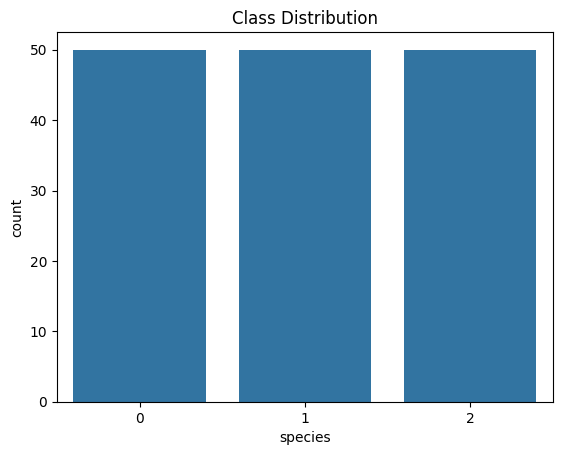

In [9]:
sns.countplot(x="species", data=df)
plt.title("Class Distribution")
plt.show()

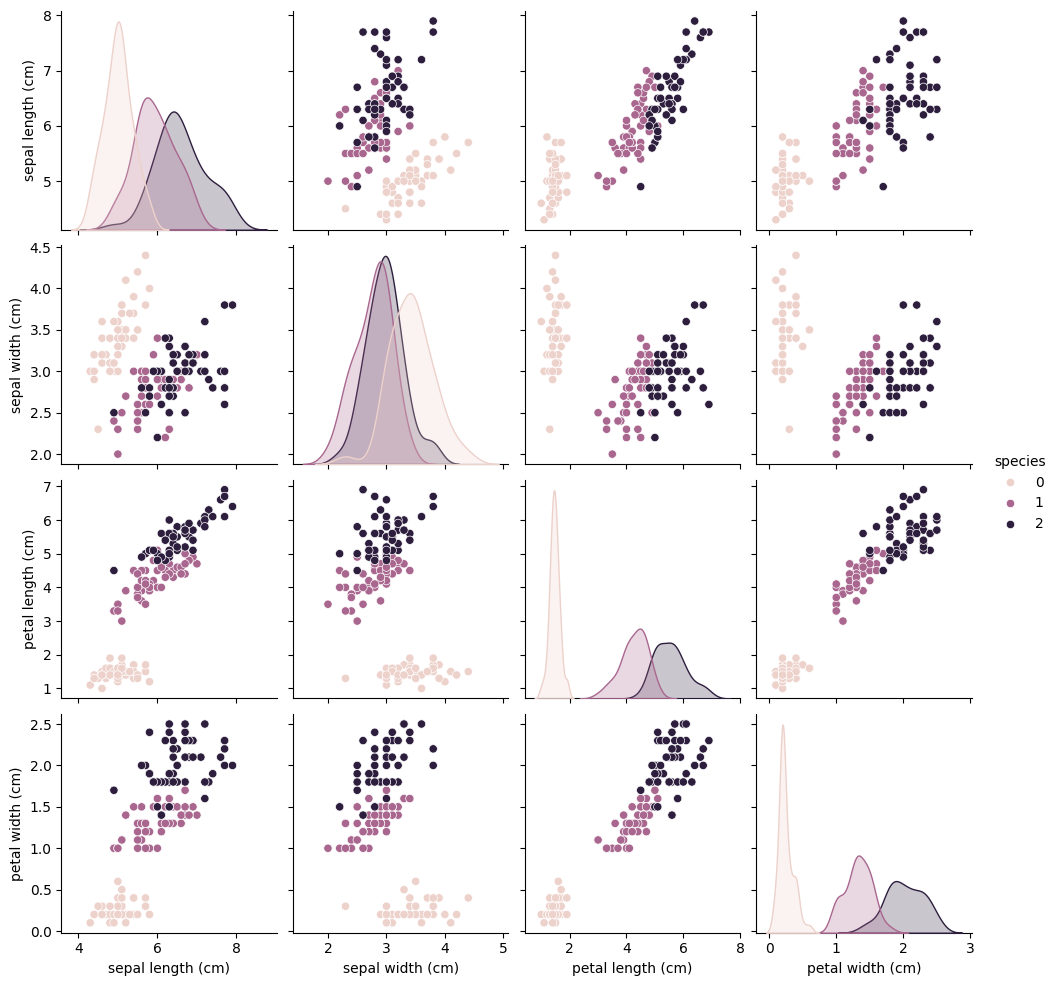

In [10]:
sns.pairplot(df, hue="species")
plt.show()

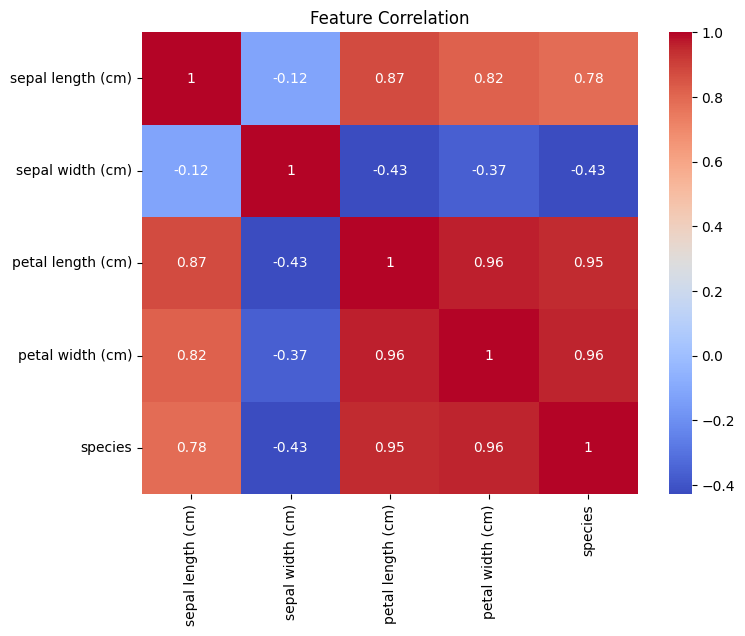

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


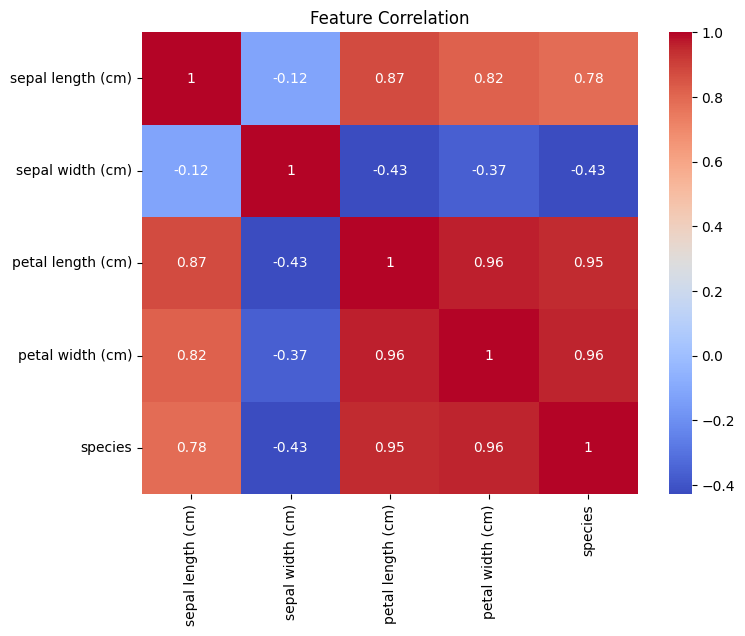

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [13]:
X = df.drop("species", axis=1)
y = df["species"]


In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [20]:

X_scaled[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)


In [13]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

In [33]:
model = LogisticRegression(C=100, max_iter=200)

In [34]:
model.fit(X_train, y_train)


LogisticRegression(C=100, max_iter=200)

In [35]:
y_val_pred = model.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)

print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 0.9090909090909091

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.78      1.00      0.88         7
           2       1.00      0.71      0.83         7

    accuracy                           0.91        22
   macro avg       0.93      0.90      0.90        22
weighted avg       0.93      0.91      0.91        22



In [36]:
y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)

print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))


Test Accuracy: 0.9130434782608695

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.80      1.00      0.89         8
           2       1.00      0.75      0.86         8

    accuracy                           0.91        23
   macro avg       0.93      0.92      0.92        23
weighted avg       0.93      0.91      0.91        23



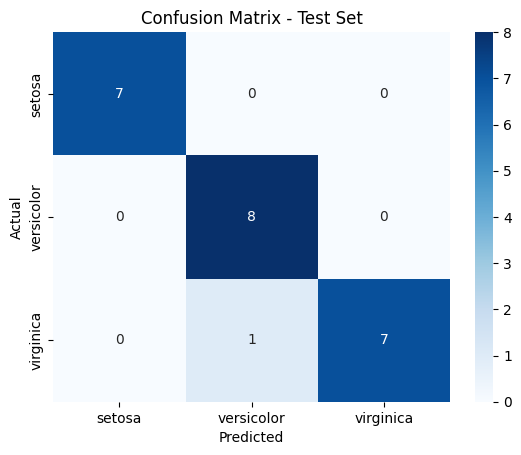

In [18]:
cm = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()
